In [1]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Folder containing your .pt result files
results_dir = "./results"  # Change to your actual path

methods = ["RandomMask", "SelectiveMask", "SJLT", "FJLT", "Rand-32768_SJLT", "Rand-32768_Gaussian", "Loc-32768_SJLT", "Loc-32768_Gaussian", "Rand-131072_SJLT", "Rand-131072_Gaussian", "Loc-131072_SJLT", "Loc-131072_Gaussian", "Rand-524288_SJLT", "Rand-524288_Gaussian", "Loc-524288_SJLT", "Loc-524288_Gaussian"]
dims = [2048, 4096, 8192]

# Initialize dictionaries to store the results
lds_data = {method: [] for method in methods}
proj_time_data = {method: [] for method in methods}

# Load results from files
for method in methods:
    for dim in dims:
        filename = f"{method}-{dim}.pt"
        filepath = os.path.join(results_dir, filename)
        if os.path.exists(filepath):
            data = torch.load(filepath)
            lds_data[method].append(data["lds"])
            proj_time_data[method].append(data["proj_time"])
            damping = data["best_damping"]
            print(f"Setting: {method}-{dim}:\t damping {damping}\t lds {data['lds']:.4f}\t proj_time {data['proj_time']:.4f}")
        else:
            print(f"Warning: {filepath} not found!")
            # Fill in with NaN or some placeholder
            lds_data[method].append(np.nan)
            proj_time_data[method].append(np.nan)

# Colors for methods
colors = {
    "RandomMask": 'lightcoral',
    "SelectiveMask": 'limegreen',
    "SJLT": 'dodgerblue',
    "FJLT": 'purple',
    "Rand-32768_SJLT": 'lightcoral',
    "Rand-32768_Gaussian": 'lightcoral',
    "Rand-131072_SJLT": 'lightcoral',
    "Rand-131072_Gaussian": 'lightcoral',
    "Rand-524288_SJLT": 'lightcoral',
    "Rand-524288_Gaussian": 'lightcoral',
    "Loc-32768_SJLT": 'limegreen',
    "Loc-32768_Gaussian": 'limegreen',
    "Loc-131072_SJLT": 'limegreen',
    "Loc-131072_Gaussian": 'limegreen',
    "Loc-524288_SJLT": 'limegreen',
    "Loc-524288_Gaussian": 'limegreen',
}

Setting: Random-2048:	 damping 0.001	 lds 0.1281	 proj_time 0.5341
Setting: Random-4096:	 damping 0.001	 lds 0.1456	 proj_time 0.5067
Setting: Random-8192:	 damping 0.001	 lds 0.1469	 proj_time 0.5179
Setting: SelectiveMask-2048:	 damping 0.001	 lds 0.1431	 proj_time 0.3800
Setting: SelectiveMask-4096:	 damping 0.001	 lds 0.1599	 proj_time 0.3971
Setting: SelectiveMask-8192:	 damping 0.001	 lds 0.1586	 proj_time 0.4345
Setting: SJLT-2048:	 damping 0.001	 lds 0.3062	 proj_time 21.6460
Setting: SJLT-4096:	 damping 0.001	 lds 0.3533	 proj_time 21.1881
Setting: SJLT-8192:	 damping 0.001	 lds 0.3861	 proj_time 21.3192
Setting: FJLT-2048:	 damping 1.0	 lds 0.2907	 proj_time 100.8136
Setting: FJLT-4096:	 damping 1.0	 lds 0.3585	 proj_time 156.0613
Setting: FJLT-8192:	 damping 1.0	 lds 0.4011	 proj_time 269.9093
Setting: Rand-32768_SJLT-2048:	 damping 0.0001	 lds 0.1869	 proj_time 1.1557
Setting: Rand-32768_SJLT-4096:	 damping 0.0001	 lds 0.2098	 proj_time 1.4817
Setting: Rand-32768_SJLT-8192:

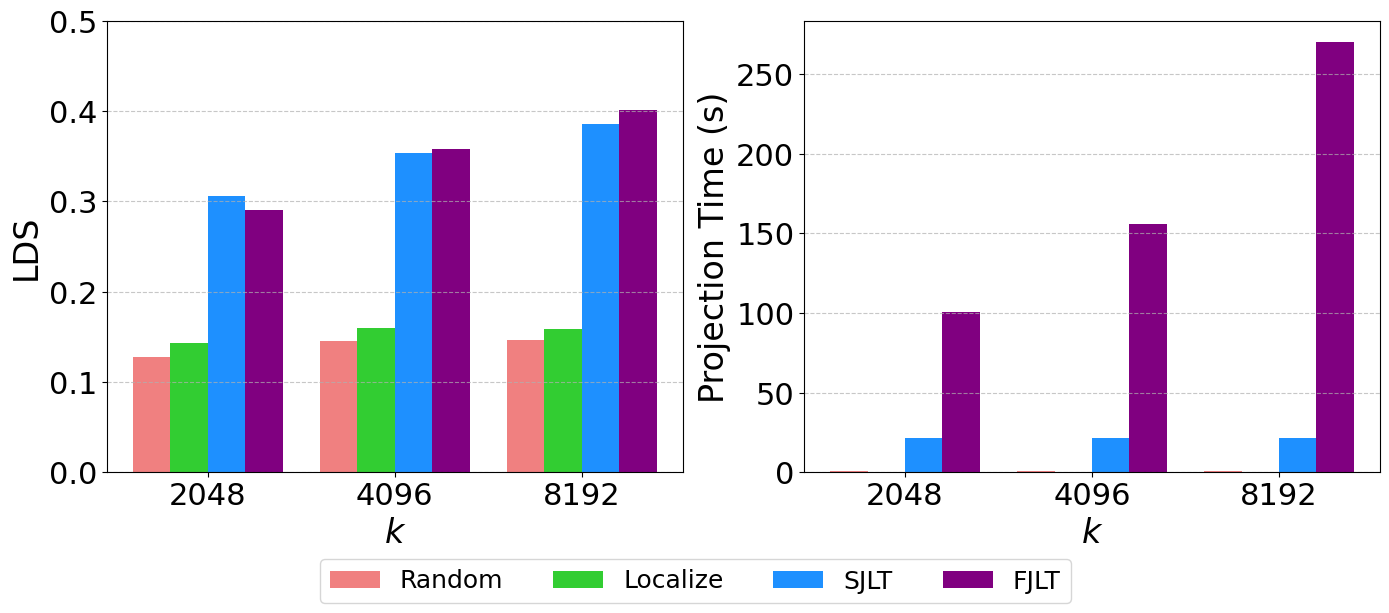

In [ ]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.2  # Adjusted to fit 4 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 4 methods
pos1 = x - 1.5*width
pos2 = x - 0.5*width
pos3 = x + 0.5*width
pos4 = x + 1.5*width

# LDS subplot
axs[0].bar(pos1, lds_data["RandomMask"], width, label="RandomMask", color=colors["RandomMask"])
axs[0].bar(pos2, lds_data["SelectiveMask"], width, label="SelectiveMask", color=colors["SelectiveMask"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
axs[0].bar(pos4, lds_data["FJLT"], width, label="FJLT", color=colors["FJLT"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("$k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.5)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["RandomMask"], width, color=colors["RandomMask"])
axs[1].bar(pos2, proj_time_data["SelectiveMask"], width, color=colors["SelectiveMask"])
axs[1].bar(pos3, proj_time_data["SJLT"], width, color=colors["SJLT"])
axs[1].bar(pos4, proj_time_data["FJLT"], width, color=colors["FJLT"])
# axs[1].set_title("Projection Time by Projection Dimension")
axs[1].set_xlabel("$k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["RandomMask", "SelectiveMask", "SJLT", "FJLT"], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/MusicTransformer_MAESTRO.pdf', format='pdf', bbox_inches="tight")
plt.show()

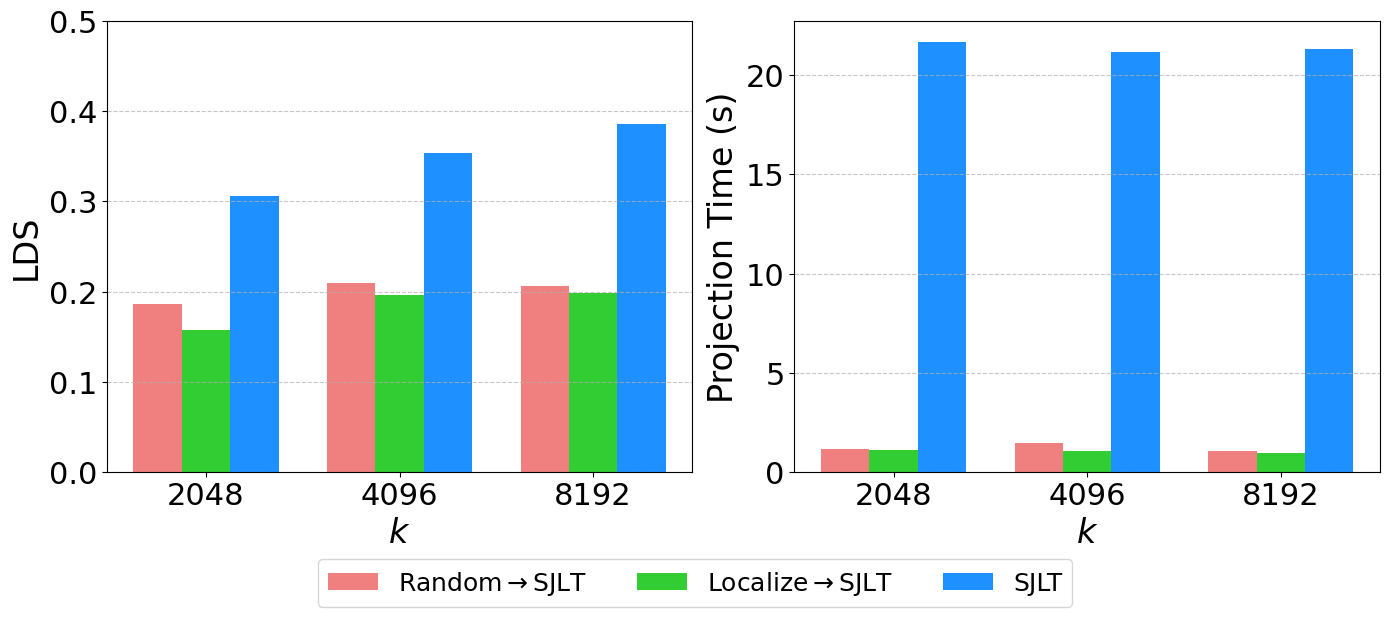

In [4]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-32768_SJLT"], width, label="Rand-32768_SJLT", color=colors["Rand-32768_SJLT"])
axs[0].bar(pos2, lds_data["Loc-32768_SJLT"], width, label="Loc-32768_SJLT", color=colors["Loc-32768_SJLT"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("$k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.5)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["Rand-32768_SJLT"], width, color=colors["Rand-32768_SJLT"])
axs[1].bar(pos2, proj_time_data["Loc-32768_SJLT"], width, color=colors["Loc-32768_SJLT"])
axs[1].bar(pos3, proj_time_data["SJLT"], width, color=colors["SJLT"])
# axs[1].set_title("Projection Time by Projection Dimension")
axs[1].set_xlabel("$k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random$\\to$SJLT", "SelectiveMask$\\to$SJLT", "SJLT"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/MusicTransformer_MAESTRO_two-stage_32768.pdf', format='pdf', bbox_inches="tight")
plt.show()

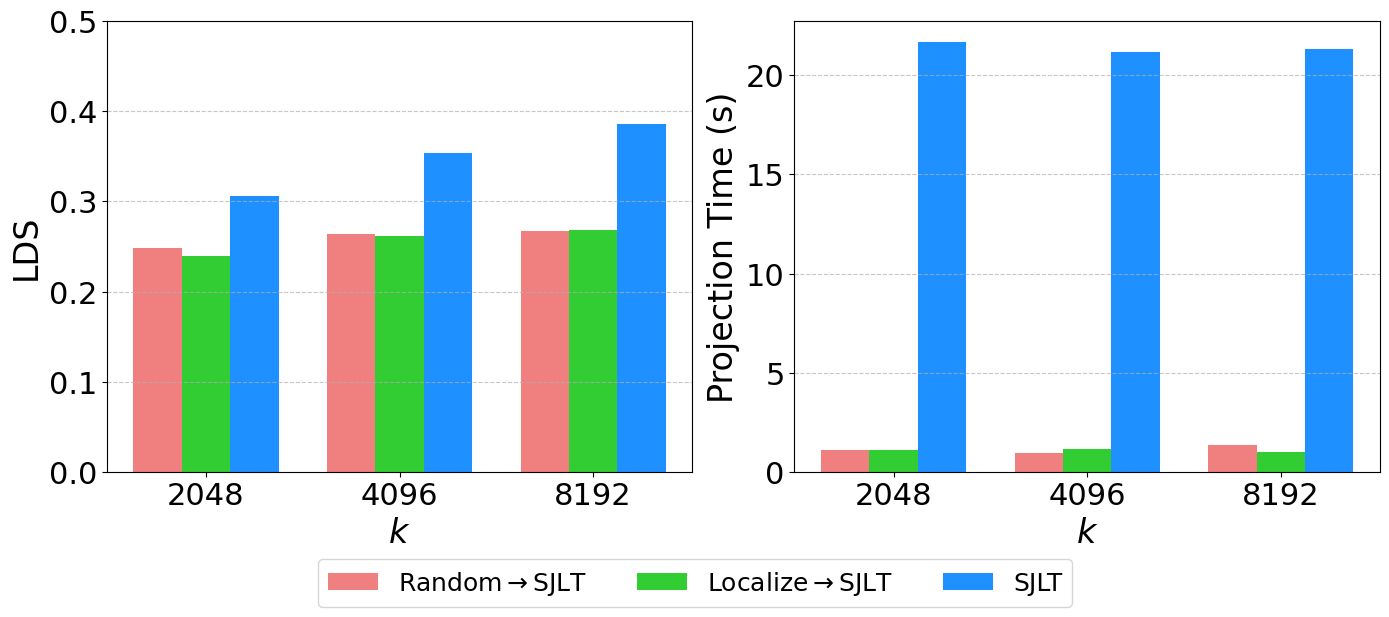

In [5]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-131072_SJLT"], width, label="Rand-131072_SJLT", color=colors["Rand-131072_SJLT"])
axs[0].bar(pos2, lds_data["Loc-131072_SJLT"], width, label="Loc-131072_SJLT", color=colors["Loc-131072_SJLT"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("$k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.5)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["Rand-131072_SJLT"], width, label="Rand-131072_SJLT", color=colors["Rand-131072_SJLT"])
axs[1].bar(pos2, proj_time_data["Loc-131072_SJLT"], width, label="Loc-131072_SJLT", color=colors["Loc-131072_SJLT"])
axs[1].bar(pos3, proj_time_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
# axs[1].set_title("Projection Time by Projection Dimension")
axs[1].set_xlabel("$k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random$\\to$SJLT", "SelectiveMask$\\to$SJLT", "SJLT"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/MusicTransformer_MAESTRO_two-stage_131072.pdf', format='pdf', bbox_inches="tight")
plt.show()

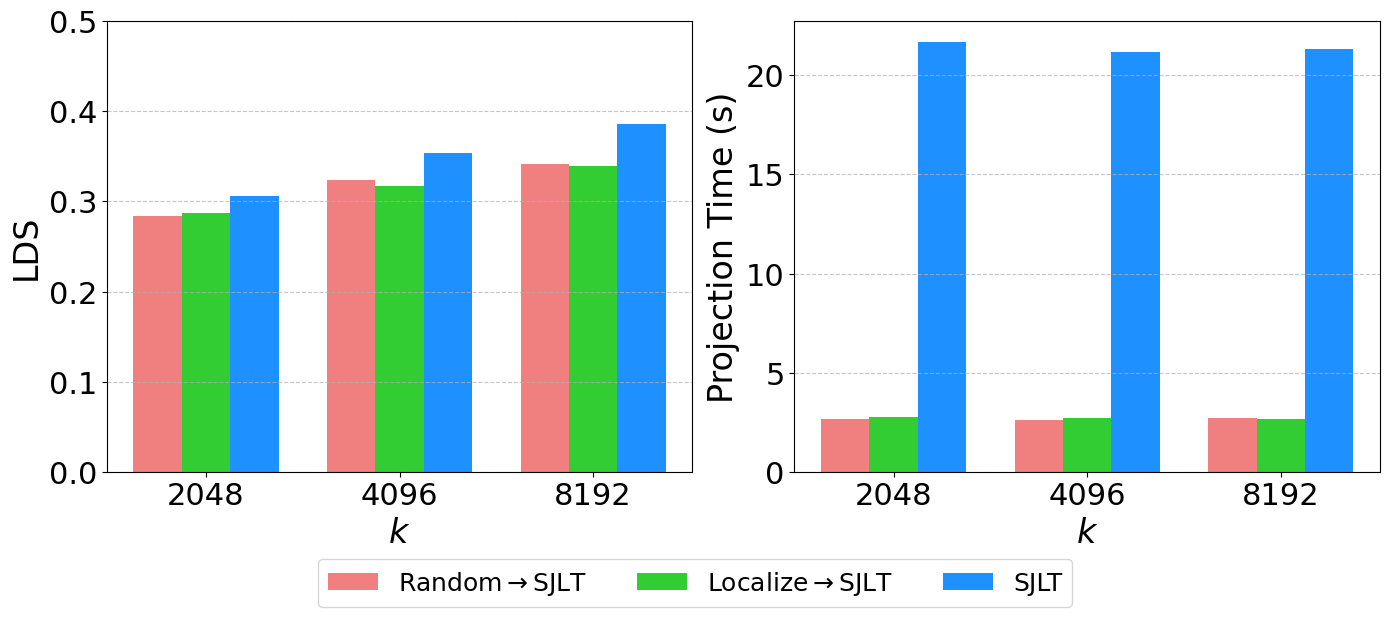

In [6]:
# Bar plot setup
x = np.arange(len(dims))  # one x location per projection dimension
width = 0.25  # Adjusted to fit 3 bars

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate bar positions for 3 methods
pos1 = x - width
pos2 = x
pos3 = x + width

# LDS subplot
axs[0].bar(pos1, lds_data["Rand-524288_SJLT"], width, label="Rand-524288_SJLT", color=colors["Rand-524288_SJLT"])
axs[0].bar(pos2, lds_data["Loc-524288_SJLT"], width, label="Loc-524288_SJLT", color=colors["Loc-524288_SJLT"])
axs[0].bar(pos3, lds_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
# axs[0].set_title("LDS by Projection Dimension")
axs[0].set_xlabel("$k$", fontsize=24)
axs[0].set_ylabel("LDS", fontsize=24)
axs[0].set_xticks(x)
axs[0].set_xticklabels(dims)
axs[0].set_ylim(0.0, 0.5)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Projection Time subplot
axs[1].bar(pos1, proj_time_data["Rand-524288_SJLT"], width, label="Rand-524288_SJLT", color=colors["Rand-524288_SJLT"])
axs[1].bar(pos2, proj_time_data["Loc-524288_SJLT"], width, label="Loc-524288_SJLT", color=colors["Loc-524288_SJLT"])
axs[1].bar(pos3, proj_time_data["SJLT"], width, label="SJLT", color=colors["SJLT"])
# axs[1].set_title("Projection Time by Projection Dimension")
axs[1].set_xlabel("$k$", fontsize=24)
axs[1].set_ylabel("Projection Time (s)", fontsize=24)
axs[1].set_xticks(x)
axs[1].set_xticklabels(dims)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[0].tick_params(axis='x', labelsize=22)
axs[0].tick_params(axis='y', labelsize=22)
axs[1].tick_params(axis='x', labelsize=22)
axs[1].tick_params(axis='y', labelsize=22)

# Add shared legend
fig.legend(["Random$\\to$SJLT", "SelectiveMask$\\to$SJLT", "SJLT"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.03), fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.savefig('../Figures/MusicTransformer_MAESTRO_two-stage_524288.pdf', format='pdf', bbox_inches="tight")
plt.show()